In [1]:
import argparse
import random
import tensorflow as tf
import os
import minerl
import tree_trajectory
import network
import numpy as np
from tensorflow.keras import datasets, layers, models

C:\Users\Halim\anaconda3\lib\site-packages\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [2]:
#paths
workspace_path= 'C:/Users/Halim/Downloads/minecraftRL/minecraft_bot_dev-master'
data_path='C:/Users/Halim/Downloads/minecraftRL/MineRLenv'
env_name = 'MineRLTreechop'
gpu_use = True
pretrained_model = None
tree_data = minerl.data.make('MineRLTreechop-v0', data_dir=data_path)

In [3]:
#if gpu exists
if gpu_use == True:
    gpus = tf.config.experimental.list_physical_devices('GPU')
    tf.config.experimental.set_virtual_device_configuration(gpus[0],
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4000)])
else:
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

#location for model summary
writer = tf.summary.create_file_writer(workspace_path + "/tree_tensorboard")

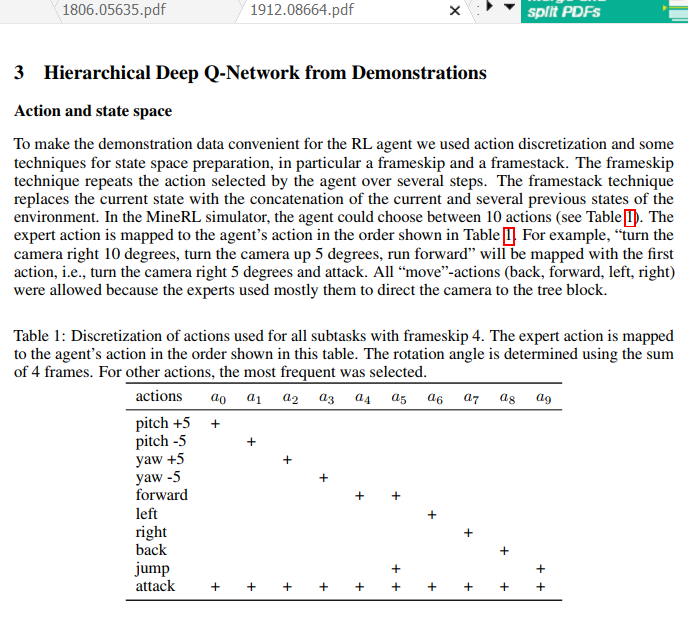

In [222]:
##################
class TreeTrajectoryDataset(tf.data.Dataset):
    def _generator(num_trajectorys):
        while True:
            trajectory_names = tree_data.get_trajectory_names()
            #print("len(trajectory_names): ", len(trajectory_names))
                
            #https://minerl.io/docs/api/data.html
            trajectory_name = random.choice(trajectory_names)
            print("trajectory_name: ", trajectory_name)
                
            trajectory = tree_data.load_data(trajectory_name, skip_interval=0, include_metadata=False)
            #print("trajectory: ", trajectory)
                
            noop_action_num = 0
                
            all_actions = []
            all_obs = []
            for dataset_observation, dataset_action, reward, next_state, done in trajectory:  
                #print("reward: ", reward)
                    
                #state_pov = dataset_observation['pov']
                #observation = np.concatenate((dataset_observation['pov'] / 255.0, inventory_channel), axis=2)
                # OrderedDict([('pov', array([[[ 0,  0,  0],
                #         [ 0,  0,  2],
                #         [ 0,  2,  0],
                #         ...,
                #         [30, 57, 16],
                #         [ 0,  2,  0],
                #         [ 0,  2,  0]]], dtype=uint8))])
                observation = dataset_observation['pov'] / 255.0

                #OrderedDict([('attack', 1), ('back', 0), ('camera', array([0., 0.], dtype=float32)), ('forward', 0), ('jump', 0), ('left', 0), ('right', 0), ('sneak', 0), ('sprint', 0)])
                act_cam_0 = dataset_action['camera'][0]
                act_cam_1 = dataset_action['camera'][1]
                act_attack = dataset_action['attack'] #1
                act_forward = dataset_action['forward'] #2
                act_jump = dataset_action['jump'] #3
                act_back = dataset_action['back'] #4
                act_left = dataset_action['left'] #5
                act_right = dataset_action['right'] #6
                act_sneak = dataset_action['sneak'] #7

                if (abs(act_cam_0 > 0) or abs(act_cam_1 > 0)): #if there was a change in camera at all
                    if ( (act_cam_1 < 0) & ( abs(act_cam_0) < abs(act_cam_1) ) ): #left (negative) camera turn
                        if (act_forward == 1):
                            if (act_attack == 1):
                                act_index = 0
                            elif (act_jump == 1):
                                act_index = 1
                            elif (act_sneak == 1):
                                act_index = 2
                            else:
                                act_index = 3

                        elif (act_back == 1):
                            if (act_attack == 1):
                                act_index = 4
                            elif (act_jump == 1):
                                act_index = 5
                            elif (act_sneak == 1):
                                act_index = 6
                            else:
                                act_index = 7

                        elif (act_right == 1):
                            if (act_attack == 1):
                                act_index = 8
                            elif (act_jump == 1):
                                act_index = 9
                            elif (act_sneak == 1):
                                act_index = 10
                            else:
                                act_index = 11

                        elif (act_left == 1):
                            if (act_attack == 1):
                                act_index = 12
                            elif (act_jump == 1):
                                act_index = 13
                            elif (act_sneak == 1):
                                act_index = 14
                            else:
                                act_index = 15

                        elif (act_sneak == 1):
                            if (act_attack == 1):
                                act_index = 16
                            elif (act_jump == 1):
                                act_index = 17
                            elif (act_sneak == 1):
                                act_index = 18
                            else:
                                act_index = 19

                        elif (act_attack == 1):
                            act_index = 20

                        elif (act_jump == 1):
                            act_index = 21

                        else:
                            act_index = 22


                    elif ( (act_cam_1 > 0) & ( abs(act_cam_0) < abs(act_cam_1) ) ): #right (positive) camera turn

                        if (act_forward == 1):
                            if (act_attack == 1):
                                act_index = 23
                            elif (act_jump == 1):
                                act_index = 24
                            elif (act_sneak == 1):
                                act_index = 25
                            else:
                                act_index = 26

                        elif (act_back == 1):
                            if (act_attack == 1):
                                act_index = 27
                            elif (act_jump == 1):
                                act_index = 28
                            elif (act_sneak == 1):
                                act_index = 29
                            else:
                                act_index = 30

                        elif (act_right == 1):
                            if (act_attack == 1):
                                act_index = 31
                            elif (act_jump == 1):
                                act_index = 32
                            elif (act_sneak == 1):
                                act_index = 33
                            else:
                                act_index = 34

                        elif (act_left == 1):
                            if (act_attack == 1):
                                act_index = 35
                            elif (act_jump == 1):
                                act_index = 36
                            elif (act_sneak == 1):
                                act_index = 37
                            else:
                                act_index = 38

                        elif (act_sneak == 1):
                            if (act_attack == 1):
                                act_index = 39
                            elif (act_jump == 1):
                                act_index = 40
                            elif (act_sneak == 1):
                                act_index = 41
                            else:
                                act_index = 42

                        elif (act_attack == 1):
                            act_index = 43

                        elif (act_jump == 1):
                            act_index = 44

                        else:
                            act_index = 45

                    elif ( (act_cam_0 < 0) & ( abs(act_cam_0) > abs(act_cam_1) ) ): #down (negative) camera turn
                        if (act_forward == 1):
                            if (act_attack == 1):
                                act_index = 46
                            elif (act_jump == 1):
                                act_index = 47
                            elif (act_sneak == 1):
                                act_index = 48
                            else:
                                act_index = 49

                        elif (act_back == 1):
                            if (act_attack == 1):
                                act_index = 50
                            elif (act_jump == 1):
                                act_index = 51
                            elif (act_sneak == 1):
                                act_index = 52
                            else:
                                act_index = 53

                        elif (act_right == 1):
                            if (act_attack == 1):
                                act_index = 54
                            elif (act_jump == 1):
                                act_index = 55
                            elif (act_sneak == 1):
                                act_index = 56
                            else:
                                act_index = 57

                        elif (act_left == 1):
                            if (act_attack == 1):
                                act_index = 58
                            elif (act_jump == 1):
                                act_index = 59
                            elif (act_sneak == 1):
                                act_index = 60
                            else:
                                act_index = 61

                        elif (act_sneak == 1):
                            if (act_attack == 1):
                                act_index = 62
                            elif (act_jump == 1):
                                act_index = 63
                            elif (act_sneak == 1):
                                act_index = 64
                            else:
                                act_index = 65

                        elif (act_attack == 1):
                            act_index = 66

                        elif (act_jump == 1): #add attack here? for jump-attack?
                            act_index = 67

                        else:
                            act_index = 68

                    elif ( (act_cam_0 > 0) & ( abs(act_cam_0) > abs(act_cam_1) ) ): #up (positive) camera turn
                        if (act_forward == 1):
                            if (act_attack == 1):
                                act_index = 69
                            elif (act_jump == 1):
                                act_index = 70
                            elif (act_sneak == 1):
                                act_index = 71
                            else:
                                act_index = 72

                        elif (act_back == 1):
                            if (act_attack == 1):
                                act_index = 73
                            elif (act_jump == 1):
                                act_index = 74
                            elif (act_sneak == 1):
                                act_index = 75
                            else:
                                act_index = 76

                        elif (act_right == 1):
                            if (act_attack == 1):
                                act_index = 77
                            elif (act_jump == 1):
                                act_index = 78
                            elif (act_sneak == 1):
                                act_index = 79
                            else:
                                act_index = 80

                        elif (act_left == 1):
                            if (act_attack == 1):
                                act_index = 81
                            elif (act_jump == 1):
                                act_index = 82
                            elif (act_sneak == 1):
                                act_index = 83
                            else:
                                act_index = 84

                        elif (act_sneak == 1):
                            if (act_attack == 1):
                                act_index = 85
                            elif (act_jump == 1):
                                act_index = 86
                            elif (act_sneak == 1):
                                act_index = 87
                            else:
                                act_index = 88

                        elif (act_attack == 1):
                            act_index = 89

                        elif (act_jump == 1):
                            act_index = 90

                        else:
                            act_index = 91


                else:
                    if (act_forward == 1):
                        if (act_attack == 1):
                            act_index = 92
                        elif (act_jump == 1):
                            act_index = 93
                        elif (act_sneak == 1):
                            act_index = 94
                        else:
                            act_index = 95

                    elif (act_back == 1):
                        if (act_attack == 1):
                            act_index = 96
                        elif (act_jump == 1):
                            act_index = 97
                        elif (act_sneak == 1):
                            act_index = 98
                        else:
                            act_index = 99

                    elif (act_right == 1):
                        if (act_attack == 1):
                            act_index = 100
                        elif (act_jump == 1):
                            act_index = 101
                        elif (act_sneak == 1):
                            act_index = 102
                        else:
                            act_index = 103

                    elif (act_left == 1):
                        if (act_attack == 1):
                            act_index = 104
                        elif (act_jump == 1):
                            act_index = 105
                        elif (act_sneak == 1):
                            act_index = 106
                        else:
                            act_index = 107

                    elif (act_sneak == 1):
                        if (act_attack == 1):
                            act_index = 108
                        elif (act_jump == 1):
                            act_index = 109
                        elif (act_sneak == 1):
                            act_index = 110
                        else:
                            act_index = 111

                    elif (act_attack == 1): #MOST COMMON?
                        act_index = 112

                    elif (act_jump == 1):
                        act_index = 113

                    else:
                        act_index = 114
                    
                

#                 if (dataset_action['attack'] == 0 and dataset_action['back'] == 0 and dataset_action['camera'][0] == 0.0 and 
#                     dataset_action['camera'][1] == 0.0 and dataset_action['forward'] == 0 and dataset_action['jump'] == 0 and 
#                     dataset_action['left'] == 0 and dataset_action['right'] == 0 and dataset_action['sneak'] == 0):
#                     #print("continue: ")
#                     continue

#                 if action_index == 41:
#                     #print("camera_threshols: ", camera_threshols)
#                     #print("dataset_action: ", dataset_action)
#                     noop_action_num += 1
                        
                #print("observation.shape: ", observation.shap
                #print("action_index: ", action_index)
                #print("done: ", done)

                all_obs.append([observation])#added []
                all_actions.append(np.array([act_index]))

            print("len(all_obs): ", len(all_obs))
#             print("noop_action_num: ", noop_action_num)
            print("")
            yield (all_obs, all_actions)

            break
    
    def __new__(cls, num_trajectorys=3):
        return tf.data.Dataset.from_generator(
            cls._generator,
            output_types=(tf.dtypes.float32, tf.dtypes.int32),
            args=(num_trajectorys,)
        )


#################

In [223]:
dataset = tf.data.Dataset.range(1).interleave(TreeTrajectoryDataset, 
num_parallel_calls=tf.data.AUTOTUNE).batch(1).prefetch(tf.data.AUTOTUNE)

v3_content_squash_angel-3_16074-17640

In [224]:
for batch in dataset:
    episode_size = batch[0].shape[1] #only 1 batch per video
    print("episode_size: ", episode_size) #number of images in the batch/video
        
    replay_obs_list = batch[0][0] #all images in the single batch/video
#     print(replay_obs_list.shape)
    replay_act_list = batch[1][0] #all actions per image in the single batch/video
            
    replay_obs_array = tf.concat(replay_obs_list, 0) #just to convert format to a tf.Tensor 
    replay_act_array = tf.concat(replay_act_list, 0) #https://www.tensorflow.org/api_docs/python/tf/concat
#or
#     replay_obs_array = replay_obs_list
#     replay_act_array = replay_act_list 
    
    batch_size = replay_obs_array.shape[0]
    tf.print("batch_size: ", batch_size)
            
    replay_act_array_onehot = tf.one_hot(replay_act_array, num_actions)
    replay_act_array_onehot = tf.reshape(replay_act_array_onehot, (batch_size, num_actions))
    

trajectory_name:  v3_juvenile_apple_angel-41_51340-57049


100%|██████████| 5678/5678 [00:00<00:00, 7474.24it/s] 


len(all_obs):  5678

episode_size:  5678
batch_size:  5678


In [225]:
replay_obs_array

<tf.Tensor: shape=(5678, 1, 64, 64, 3), dtype=float32, numpy=
array([[[[[0.03529412, 0.07843138, 0.03529412],
          [0.03137255, 0.07450981, 0.03137255],
          [0.03137255, 0.07450981, 0.03137255],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],

         [[0.01960784, 0.0627451 , 0.01960784],
          [0.03921569, 0.08235294, 0.03921569],
          [0.03529412, 0.07843138, 0.03529412],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.05490196, 0.0627451 , 0.05098039]],

         [[0.00784314, 0.03137255, 0.        ],
          [0.03529412, 0.05882353, 0.02352941],
          [0.03137255, 0.0627451 , 0.01568628],
          ...,
          [0.        , 0.        , 0.        ],
          [0.03529412, 0.07843138, 0.02745098],
          [0.05098039, 0.09411765, 0.04313726]],

         ...,

        

In [226]:
replay_obs_array.shape

TensorShape([5678, 1, 64, 64, 3])

In [227]:
# replay_obs_array_expand = np.expand_dims(replay_obs_array[0], axis=0)

In [228]:
# replay_obs_array_expand.shape

In [229]:
replay_obs_array_expand=tf.concat(replay_obs_list, 0)

In [230]:
replay_obs_array_expand.shape

TensorShape([5678, 1, 64, 64, 3])

In [231]:
len(replay_obs_array_expand)

5678

In [232]:
# for i in range(len(replay_obs_array_expand)):
#     replay_obs_array_expand[i] = np.expand_dims(replay_obs_array_expand[i], axis=0)

In [233]:
replay_obs_array_expand

<tf.Tensor: shape=(5678, 1, 64, 64, 3), dtype=float32, numpy=
array([[[[[0.03529412, 0.07843138, 0.03529412],
          [0.03137255, 0.07450981, 0.03137255],
          [0.03137255, 0.07450981, 0.03137255],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],

         [[0.01960784, 0.0627451 , 0.01960784],
          [0.03921569, 0.08235294, 0.03921569],
          [0.03529412, 0.07843138, 0.03529412],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.05490196, 0.0627451 , 0.05098039]],

         [[0.00784314, 0.03137255, 0.        ],
          [0.03529412, 0.05882353, 0.02352941],
          [0.03137255, 0.0627451 , 0.01568628],
          ...,
          [0.        , 0.        , 0.        ],
          [0.03529412, 0.07843138, 0.02745098],
          [0.05098039, 0.09411765, 0.04313726]],

         ...,

        

In [234]:
# tf.expand_dims(replay_obs_array[0,:,:,:], 0)

In [235]:
replay_act_array_onehot

<tf.Tensor: shape=(5678, 115), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [236]:
# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 1

num_actions = 115 # was 43
num_hidden_units= 512
CLASSES_LIST=num_actions

def create_convlstm_model():
    '''
    This function will construct the required convlstm model.
    Returns:
        model: It is the required constructed convlstm model.
    '''

    # We will use a Sequential model for model construction
    model = models.Sequential()

    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(layers.ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                      IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(layers.MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(layers.TimeDistributed(layers.Dropout(0.2)))
    
    model.add(layers.ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(layers.MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(layers.TimeDistributed(layers.Dropout(0.2)))
    
    model.add(layers.ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(layers.MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(layers.TimeDistributed(layers.Dropout(0.2)))
    
    model.add(layers.ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(layers.MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    #model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(layers.Flatten()) 
    
    model.add(layers.Dense(CLASSES_LIST, activation = "softmax"))
    
    ########################################################################################################################
     
    # Display the models summary.
    model.summary()
    
    # Return the constructed convlstm model.
    return model

In [237]:
# Construct the required convlstm model.
convlstm_model = create_convlstm_model()

# Display the success message. 
print("Model Created Successfully!")

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_15 (ConvLSTM2D)  (None, 1, 62, 62, 4)     1024      
                                                                 
 max_pooling3d_14 (MaxPoolin  (None, 1, 31, 31, 4)     0         
 g3D)                                                            
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 31, 31, 4)     0         
 tributed)                                                       
                                                                 
 conv_lstm2d_16 (ConvLSTM2D)  (None, 1, 29, 29, 8)     3488      
                                                                 
 max_pooling3d_15 (MaxPoolin  (None, 1, 15, 15, 8)     0         
 g3D)                                                            
                                                     

https://stats.stackexchange.com/questions/377966/cross-entropy-loss-for-one-hot-encoding
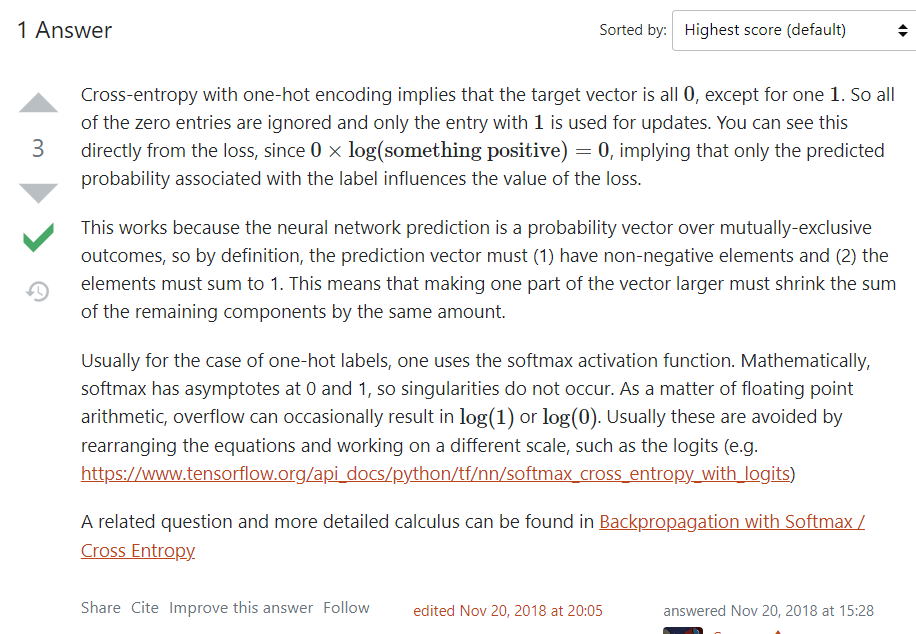

In [238]:
# Compile the model and specify loss function, optimizer and metrics values to the model
optimizer = tf.keras.optimizers.Adam(0.0001)
convlstm_model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [240]:
# Start training the model.
convlstm_model_training_history = convlstm_model.fit(x = replay_obs_array, y = replay_act_array_onehot, epochs = 50)

Epoch 1/50
178/178 [==============================] - 21s 119ms/step - loss: 3.3023 - accuracy: 0.3758
Epoch 2/50
178/178 [==============================] - 23s 127ms/step - loss: 2.4522 - accuracy: 0.3758
Epoch 3/50
178/178 [==============================] - 22s 124ms/step - loss: 2.3642 - accuracy: 0.3758
Epoch 4/50
178/178 [==============================] - 22s 123ms/step - loss: 2.3170 - accuracy: 0.3758
Epoch 5/50
178/178 [==============================] - 22s 124ms/step - loss: 2.2844 - accuracy: 0.3758
Epoch 6/50
178/178 [==============================] - 22s 123ms/step - loss: 2.2585 - accuracy: 0.3758
Epoch 7/50
178/178 [==============================] - 23s 129ms/step - loss: 2.2354 - accuracy: 0.3758
Epoch 8/50
178/178 [==============================] - 22s 126ms/step - loss: 2.2129 - accuracy: 0.3760
Epoch 9/50
178/178 [==============================] - 23s 128ms/step - loss: 2.1868 - accuracy: 0.4144
Epoch 10/50
178/178 [==============================] - 25s 138ms/step - l

In [ ]:
# model.fit(replay_obs_array,replay_act_array_onehot,epochs=100)

In [241]:
convlstm_model_training_history

In [242]:
tf.expand_dims(replay_obs_array[1000,:,:,:], 0)

<tf.Tensor: shape=(1, 1, 64, 64, 3), dtype=float32, numpy=
array([[[[[0.03921569, 0.08235294, 0.03137255],
          [0.06666667, 0.10980392, 0.05882353],
          [0.03529412, 0.07843138, 0.02745098],
          ...,
          [0.01960784, 0.03921569, 0.01568628],
          [0.00392157, 0.03529412, 0.        ],
          [0.05882353, 0.09019608, 0.05098039]],

         [[0.03529412, 0.07843138, 0.02745098],
          [0.03529412, 0.07843138, 0.02745098],
          [0.0627451 , 0.10588235, 0.05490196],
          ...,
          [0.        , 0.00392157, 0.        ],
          [0.05882353, 0.09019608, 0.05098039],
          [0.03921569, 0.07058824, 0.03137255]],

         [[0.01960784, 0.0627451 , 0.01960784],
          [0.07058824, 0.11372549, 0.07058824],
          [0.03529412, 0.07843138, 0.02745098],
          ...,
          [0.02352941, 0.06666667, 0.01568628],
          [0.03137255, 0.07450981, 0.02352941],
          [0.04313726, 0.08627451, 0.03529412]],

         ...,

         [[

In [345]:
predict_example = convlstm_model.predict(tf.expand_dims(replay_obs_array[2657,:,:,:], 0))

1/1 [==============================] - 0s 28ms/step


In [346]:
predict_example.shape #PREDICTION

(1, 115)

In [347]:
tf.argmax(predict_example[0]) #PREDICTION

<tf.Tensor: shape=(), dtype=int64, numpy=114>

In [348]:
# Y = tf.one_hot(tf.argmax(predit_example, dimension = 115), depth=1)

In [349]:
predict_example_onehot = tf.one_hot(tf.argmax(predict_example[0]), depth=115) #PREDICTION

In [350]:
predict_example_onehot #PREDICTION

<tf.Tensor: shape=(115,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [351]:
replay_act_array_onehot[2465] #ACTUAL

<tf.Tensor: shape=(115,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [352]:
tf.argmax(replay_act_array_onehot[2657]) #ACTUAL

<tf.Tensor: shape=(), dtype=int64, numpy=91>

In [339]:
replay_act_array_onehot[2465][89]

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [290]:
A = tf.constant([2, 20, 30, 3, 600])
test=tf.math.argmax(A)  # A[2] is maximum in tensor A

In [291]:
test

<tf.Tensor: shape=(), dtype=int64, numpy=4>

In [125]:
num_actions = 115 #43
num_hidden_units= 512

#https://www.geeksforgeeks.org/python-tensorflow-tf-keras-layers-conv2d-function/
model = models.Sequential() #filters, kernel_size, strides, padding
model.add(layers.Conv2D(16, 8, 4, padding="valid", activation="relu", kernel_regularizer='l2'))
model.add(layers.Conv2D(32, 4, 2, padding="valid", activation="relu", kernel_regularizer='l2'))
model.add(layers.Conv2D(32, 3, 1, padding="valid", activation="relu", kernel_regularizer='l2'))

#reshape
model.add(layers.Reshape((4*4,32)))

# initial_state = (memory_state, carry_state)
# lstm_output, final_memory_state, final_carry_state  = self.lstm(conv_3_reshaped, initial_state=initial_state, training=training)
    
#LSTM
# model.add(layers.LSTM(128, return_sequences=True, return_state=True, kernel_regularizer='l2'))

#Flatten
model.add(layers.Flatten())

#common
model.add(layers.Dense(num_hidden_units, activation="relu", kernel_regularizer='l2'))

# actor 
model.add(layers.Dense(num_actions, kernel_regularizer='l2'))

# critic 
# model.add(layers.Dense(1, kernel_regularizer='l2'))

In [126]:
# optimizer=tf.keras.optimizers.Adam(lr=1e-5, decay=1e-6)#learning rate set to not get stuck in local minimas

# Compile the model and specify loss function, optimizer and metrics values to the model
optimizer = tf.keras.optimizers.Adam(0.0001)
model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Start training the model.
convlstm_model_training_history = convlstm_model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 4,
                                                     shuffle = True, validation_split = 0.2, 
                                                     callbacks = [early_stopping_callback])

In [128]:
model.fit(replay_obs_array,replay_act_array_onehot,epochs=100)

Epoch 1/100
53/53 [==============================] - 1s 16ms/step - loss: 15.9245 - accuracy: 0.2114
Epoch 2/100
53/53 [==============================] - 1s 10ms/step - loss: 14.3873 - accuracy: 0.3772
Epoch 3/100
53/53 [==============================] - 0s 9ms/step - loss: 14.1425 - accuracy: 0.4126
Epoch 4/100
53/53 [==============================] - 0s 9ms/step - loss: 13.8832 - accuracy: 0.4269
Epoch 5/100
53/53 [==============================] - 0s 9ms/step - loss: 12.9746 - accuracy: 0.4293
Epoch 6/100
53/53 [==============================] - 1s 10ms/step - loss: 13.1148 - accuracy: 0.4311
Epoch 7/100
53/53 [==============================] - 1s 10ms/step - loss: 12.9814 - accuracy: 0.4341
Epoch 8/100
53/53 [==============================] - 1s 10ms/step - loss: 13.0704 - accuracy: 0.4341
Epoch 9/100
53/53 [==============================] - 1s 10ms/step - loss: 12.4104 - accuracy: 0.4341
Epoch 10/100
53/53 [==============================] - 0s 9ms/step - loss: 12.2124 - accuracy: 

53/53 [==============================] - 1s 10ms/step - loss: 6.1314 - accuracy: 0.4353
Epoch 82/100
53/53 [==============================] - 1s 9ms/step - loss: 6.1067 - accuracy: 0.4353
Epoch 83/100
53/53 [==============================] - 0s 9ms/step - loss: 6.0822 - accuracy: 0.4353
Epoch 84/100
53/53 [==============================] - 1s 10ms/step - loss: 6.0289 - accuracy: 0.4353
Epoch 85/100
53/53 [==============================] - 1s 11ms/step - loss: 6.0143 - accuracy: 0.4353
Epoch 86/100
53/53 [==============================] - 1s 10ms/step - loss: 5.9999 - accuracy: 0.4353
Epoch 87/100
53/53 [==============================] - 1s 10ms/step - loss: 5.9856 - accuracy: 0.4353
Epoch 88/100
53/53 [==============================] - 1s 9ms/step - loss: 5.9715 - accuracy: 0.4353
Epoch 89/100
53/53 [==============================] - 1s 10ms/step - loss: 5.9479 - accuracy: 0.4353
Epoch 90/100
53/53 [==============================] - 1s 10ms/step - loss: 5.9341 - accuracy: 0.4353
Epoch 

In [119]:
model.evaluate(testX,final_testY)

NameError: name 'model1' is not defined

In [140]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 15, 15, 16)        3088      
                                                                 
 conv2d_22 (Conv2D)          (None, 6, 6, 32)          8224      
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 reshape_7 (Reshape)         (None, 16, 32)            0         
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 115)              

https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

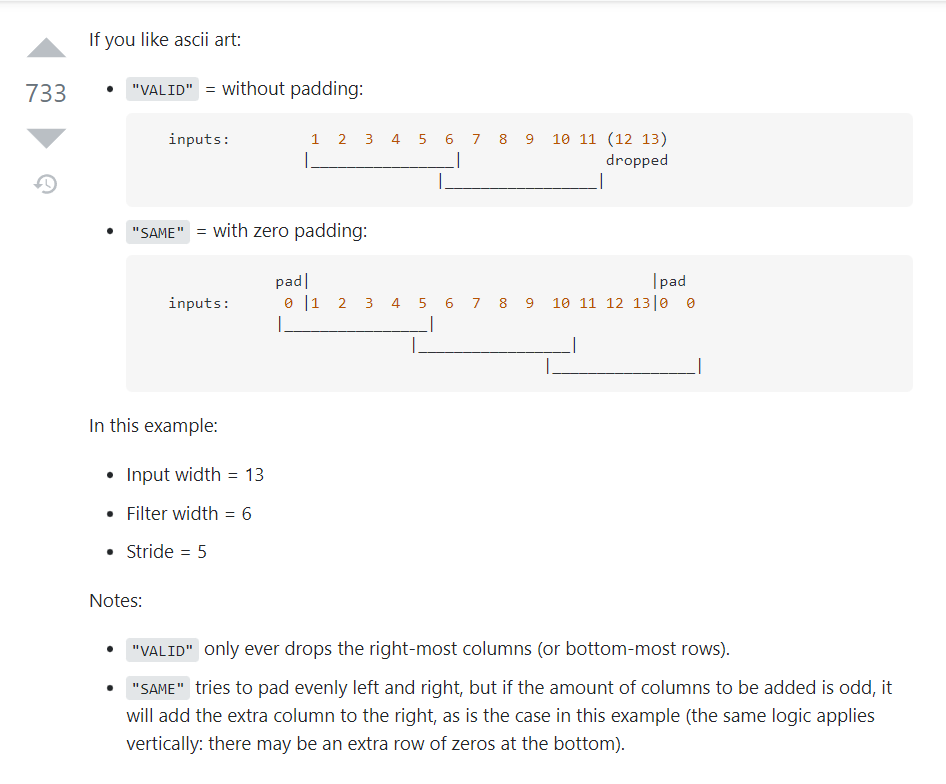

https://stackoverflow.com/questions/53580088/calculate-the-output-size-in-convolution-layer

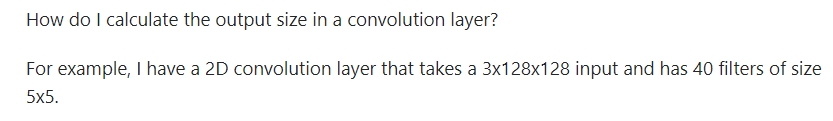
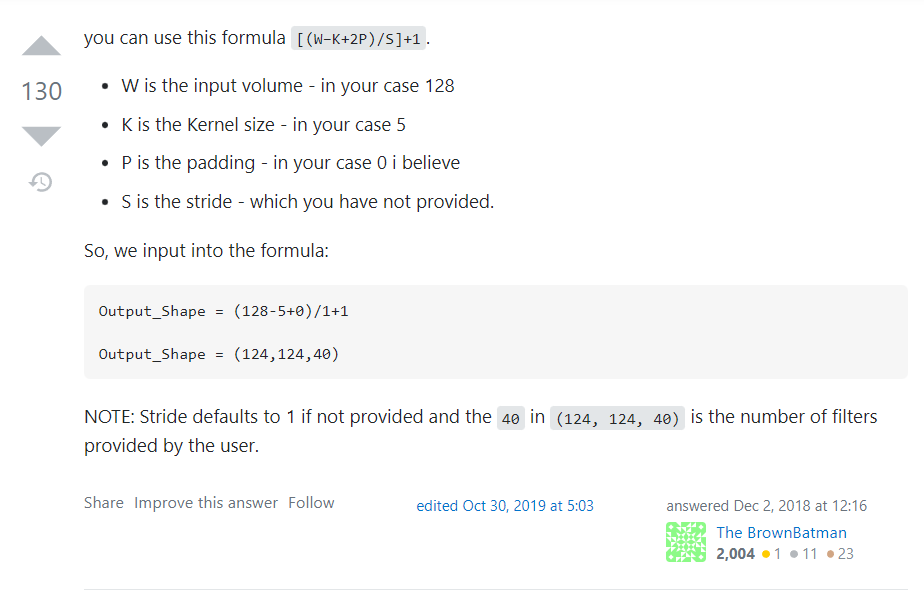

In [139]:
(128-5+0)/1+1

124.0

In [134]:
W=64
K=8
P=0
S=4

In [136]:
Output_Shape =((W-K+(2*P))/S)+1

In [137]:
Output_Shape #(15,15,16)

15.0

In [141]:
W=15
K=4
P=0
S=2

In [142]:
Output_Shape =((W-K+(2*P))/S)+1

In [143]:
Output_Shape #(6,6,32)

6.5

In [147]:
W=6
K=3
P=0
S=1

In [148]:
Output_Shape =((W-K+(2*P))/S)+1

In [150]:
Output_Shape #(4,4,32)

4.0

TRYING OUT CODE

In [49]:
count=0
for batch in dataset: #only 1 batch which has all the episodes/images in a video
    episode_size = batch[0].shape[1]
    count=count+1
    print("episode_size: ", episode_size)
    
    replay_obs_list = batch[0][0]
#     print(type(replay_obs_list))
    print(tf.shape(replay_obs_list))
#     print(len(replay_obs_list))

    replay_act_list = batch[1][0]
#     print(replay_act_list)
    print(tf.shape(replay_act_list))
    # episode_size = batch[0].shape[1]

trajectory_name:  v3_juvenile_apple_angel-7_105048-106450


100%|██████████| 1379/1379 [00:00<00:00, 11303.41it/s]


len(all_obs):  1379

episode_size:  1379
tf.Tensor([1379   64   64    3], shape=(4,), dtype=int32)
tf.Tensor([1379    1], shape=(2,), dtype=int32)


In [52]:
replay_obs_list

<tf.Tensor: shape=(1379, 64, 64, 3), dtype=float32, numpy=
array([[[[0.06666667, 0.06666667, 0.05490196],
         [0.        , 0.        , 0.        ],
         [0.05098039, 0.08235294, 0.03529412],
         ...,
         [0.08627451, 0.16470589, 0.05098039],
         [0.07450981, 0.14117648, 0.03921569],
         [0.07450981, 0.14117648, 0.03921569]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.01176471, 0.        ],
         ...,
         [0.11372549, 0.19215687, 0.07843138],
         [0.07450981, 0.14117648, 0.03921569],
         [0.07843138, 0.14509805, 0.04313726]],

        [[0.        , 0.        , 0.        ],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.05490196, 0.06666667, 0.02745098],
         ...,
         [0.07058824, 0.14901961, 0.03529412],
         [0.07058824, 0.14901961, 0.03529412],
         [0.02745098, 0.10588235, 0.        ]],

        ...,

        [[0.27058825, 0.44313726,

In [53]:
memory_state = np.zeros([1,128], dtype=np.float32)
carry_state =  np.zeros([1,128], dtype=np.float32)
step_length = 32
total_loss = 0

episode_index=0
obs = replay_obs_list[episode_index:episode_index+step_length,:,:,:] #shape=(32, 64, 64, 3), dtype=float32)
act = replay_act_list[episode_index:episode_index+step_length,:] #shape=(32, 1), dtype=int32)

In [54]:
obs

<tf.Tensor: shape=(32, 64, 64, 3), dtype=float32, numpy=
array([[[[0.06666667, 0.06666667, 0.05490196],
         [0.        , 0.        , 0.        ],
         [0.05098039, 0.08235294, 0.03529412],
         ...,
         [0.08627451, 0.16470589, 0.05098039],
         [0.07450981, 0.14117648, 0.03921569],
         [0.07450981, 0.14117648, 0.03921569]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.01176471, 0.        ],
         ...,
         [0.11372549, 0.19215687, 0.07843138],
         [0.07450981, 0.14117648, 0.03921569],
         [0.07843138, 0.14509805, 0.04313726]],

        [[0.        , 0.        , 0.        ],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.05490196, 0.06666667, 0.02745098],
         ...,
         [0.07058824, 0.14901961, 0.03529412],
         [0.07058824, 0.14901961, 0.03529412],
         [0.02745098, 0.10588235, 0.        ]],

        ...,

        [[0.27058825, 0.44313726, 0

In [55]:
replay_obs_array=tf.concat(obs, 0)

In [57]:
batch_size = replay_obs_array.shape[0]

In [58]:
batch_size

32

In [56]:
replay_obs_array

<tf.Tensor: shape=(32, 64, 64, 3), dtype=float32, numpy=
array([[[[0.06666667, 0.06666667, 0.05490196],
         [0.        , 0.        , 0.        ],
         [0.05098039, 0.08235294, 0.03529412],
         ...,
         [0.08627451, 0.16470589, 0.05098039],
         [0.07450981, 0.14117648, 0.03921569],
         [0.07450981, 0.14117648, 0.03921569]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.01176471, 0.        ],
         ...,
         [0.11372549, 0.19215687, 0.07843138],
         [0.07450981, 0.14117648, 0.03921569],
         [0.07843138, 0.14509805, 0.04313726]],

        [[0.        , 0.        , 0.        ],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.05490196, 0.06666667, 0.02745098],
         ...,
         [0.07058824, 0.14901961, 0.03529412],
         [0.07058824, 0.14901961, 0.03529412],
         [0.02745098, 0.10588235, 0.        ]],

        ...,

        [[0.27058825, 0.44313726, 0

In [64]:
print(act)

tf.Tensor(
[[112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [112]
 [ 89]
 [ 89]
 [ 89]
 [ 89]
 [112]
 [112]
 [112]
 [ 89]
 [ 89]
 [ 89]
 [112]
 [112]], shape=(32, 1), dtype=int32)


In [65]:
type(act)

tensorflow.python.framework.ops.EagerTensor

In [66]:
replay_act_array = tf.concat(act, 0)

In [67]:
type(replay_act_array)

tensorflow.python.framework.ops.EagerTensor

In [68]:
replay_act_array

<tf.Tensor: shape=(32, 1), dtype=int32, numpy=
array([[112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [112],
       [ 89],
       [ 89],
       [ 89],
       [ 89],
       [112],
       [112],
       [112],
       [ 89],
       [ 89],
       [ 89],
       [112],
       [112]])>

In [71]:
num_actions = 115 #114

In [72]:
replay_act_array_onehot = tf.one_hot(replay_act_array, num_actions)

In [73]:
replay_act_array_onehot

<tf.Tensor: shape=(32, 1, 115), dtype=float32, numpy=
array([[[0., 0., 0., ..., 1., 0., 0.]],

       [[0., 0., 0., ..., 1., 0., 0.]],

       [[0., 0., 0., ..., 1., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 1., 0., 0.]],

       [[0., 0., 0., ..., 1., 0., 0.]]], dtype=float32)>

In [74]:
replay_act_array_onehot = tf.reshape(replay_act_array_onehot, (batch_size, num_actions))

In [75]:
replay_act_array_onehot

<tf.Tensor: shape=(32, 115), dtype=float32, numpy=
array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)>

In [69]:
act_probs = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)

In [70]:
act_probs

In [50]:
memory_state = np.zeros([1,128], dtype=np.float32)
carry_state =  np.zeros([1,128], dtype=np.float32)

In [52]:
print(memory_state.shape)

(1, 128)


In [59]:
print(memory_state)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


In [39]:
num_actions = 43
num_hidden_units= 512

#https://www.geeksforgeeks.org/python-tensorflow-tf-keras-layers-conv2d-function/
model = models.Sequential() #filters, kernel_size, strides, padding
model.add(layers.Conv2D(16, 8, 4, padding="valid", activation="relu", kernel_regularizer='l2'))
model.add(layers.Conv2D(32, 4, 2, padding="valid", activation="relu", kernel_regularizer='l2'))
model.add(layers.Conv2D(32, 3, 1, padding="valid", activation="relu", kernel_regularizer='l2'))

#reshape
model.add(layers.Reshape((4*4,32)))

# initial_state = (memory_state, carry_state)
# lstm_output, final_memory_state, final_carry_state  = self.lstm(conv_3_reshaped, initial_state=initial_state, training=training)
    
#LSTM
model.add(layers.LSTM(128, return_sequences=True, return_state=True, kernel_regularizer='l2'))

#Flatten
model.add(layers.Flatten())

#common
model.add(layers.Dense(num_hidden_units, activation="relu", kernel_regularizer='l2'))

# actor 
model.add(layers.Dense(num_actions, kernel_regularizer='l2'))

# critic 
# model.add(layers.Dense(1, kernel_regularizer='l2'))

In [13]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.fit(train_genarator, epochs = 9)

In [14]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [16]:
from numpy import array

length = 5
seq = array([i/float(length) for i in range(length)])
X = seq.reshape(len(seq), 1, 1)

In [17]:
X

array([[[0. ]],

       [[0.2]],

       [[0.4]],

       [[0.6]],

       [[0.8]]])

In [25]:
# define input timeseries
timeseries = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                       [0.1**3, 0.2**3, 0.3**3, 0.4**3, 0.5**3, 0.6**3, 0.7**3, 0.8**3, 0.9**3]]).transpose()

timesteps = timeseries.shape[0]
n_features = timeseries.shape[1]
timeseries

array([[0.1  , 0.001],
       [0.2  , 0.008],
       [0.3  , 0.027],
       [0.4  , 0.064],
       [0.5  , 0.125],
       [0.6  , 0.216],
       [0.7  , 0.343],
       [0.8  , 0.512],
       [0.9  , 0.729]])

In [26]:
memory_state = np.zeros([1,128], dtype=np.float32)

In [31]:
memory_state

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [28]:
replay_memory_state_array = tf.concat(memory_state, 0)

In [29]:
replay_memory_state_array

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>